In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

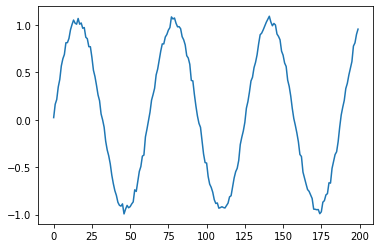

In [44]:
# sine wave of 200 points
series = np.sin(0.1*np.arange(200)) + np.random.rand(200)*.1
plt.plot(series)

In [45]:
T = 10
X = []
Y = []
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T)
Y = np.array(Y)
N = len(X)

print('X Shape: ',X.shape,' Y Shape: ',Y.shape)

X Shape:  (190, 10)  Y Shape:  (190,)


In [0]:
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i,x)
model.compile(loss='mse',optimizer=Adam(lr=.1))

In [47]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [48]:
r = model.fit(X[0:N//2],Y[0:N//2],epochs=80,validation_data=(X[N//2:N],Y[N//2:N]))

Epoch 1/80
3/3 [==============================] - 0s 25ms/step - loss: 0.6117 - val_loss: 0.4167
Epoch 2/80
3/3 [==============================] - 0s 12ms/step - loss: 0.3798 - val_loss: 0.1259
Epoch 3/80
3/3 [==============================] - 0s 13ms/step - loss: 0.1509 - val_loss: 0.1277
Epoch 4/80
3/3 [==============================] - 0s 59ms/step - loss: 0.1009 - val_loss: 0.0410
Epoch 5/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0405 - val_loss: 0.0797
Epoch 6/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0496 - val_loss: 0.0108
Epoch 7/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0261 - val_loss: 0.0597
Epoch 8/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0439 - val_loss: 0.0350
Epoch 9/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0289 - val_loss: 0.0313
Epoch 10/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0298 - val_loss: 0.0125
Epoch 11/80
3/3 [============

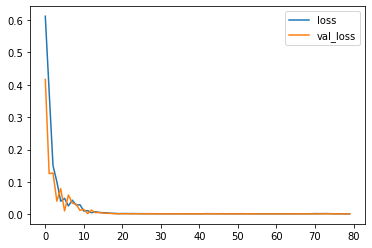

In [49]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [0]:
validation_target = Y[-N//2:]
validation_predictions = []

x = X[-N//2]

while(len(validation_predictions)<len(validation_target)):
  p = model.predict(x.reshape(1,-1))[0,0]
  validation_predictions.append(p)
  x = np.roll(x,-1)
  x[-1] = p

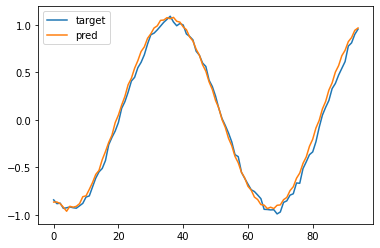

In [51]:
plt.plot(validation_target,label='target')
plt.plot(validation_predictions,label='pred')
plt.legend()